# Title

### Description

In [1]:
'''
    Dependencies
'''
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # Support for projections of type '3d'

import seaborn as sns
from scipy import stats, special

In [36]:
# Params

'''
Éiassoo
'''
POP_SIZE = 30
POP_GENERATION_SEED = 123456789

# x axis
MIN_SAMPLE_SIZE = 1
MAX_SAMPLE_SIZE = POP_SIZE
SAMPLE_SIZE_TICKS = int(POP_SIZE ** .6)

# z axis


'''
Éiassoo
'''
SAMPLING_RANDOMNESS_SEED = 12345

In [5]:
'''
    Utils
'''

# nCr
@np.vectorize
def num_of_all_possible_samples(pop_size, sample_size):
    f = special.factorial # element-wise factorial
    return f(pop_size) // (f(sample_size) * f(pop_size - sample_size))

print(num_of_all_possible_samples(20,10))

184756.0


<IPython.core.display.Javascript object>


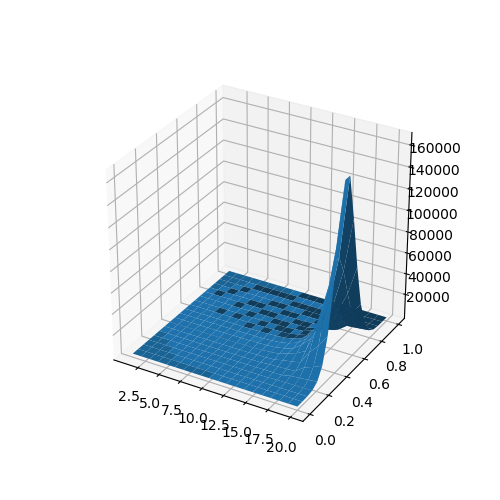

In [21]:
'''
    Draft
'''

# pop size
x = np.linspace(1, 20, 20)

# sample size relative to pop size
y = np.linspace(0, 1, 20)

# pop size x rel sample size grid
X, Y = np.meshgrid(x,y)

Z = num_of_all_possible_samples(X, np.round(Y * X))

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z)

plt.show()

In [47]:
'''
    Build
'''
np.random.seed(POP_GENERATION_SEED)
population = np.random.sample(POP_SIZE)

# sample size rel. to pop size
x = np.linspace(0, 1, 20)
sample_size = np.round(np.maximum((x * POP_SIZE), 1))

# num of samples rel. to num of all possible samples
y = np.linspace(0, 1, 20)

X, Y = np.meshgrid(x,y)

number_of_samples = Y * num_of_all_possible_samples(POP_SIZE, x_values)

# standard error of the mean
#sem = np.array([np.random.choice(population, size=sample_size) for _ in np.arange(number_of_samples)]).std(ddof=1)
a = np.arange(number_of_samples)

# https://codereview.stackexchange.com/questions/83018/vectorized-numpy-version-of-arange-with-multiple-start-stop

# Z1 = 

#print(number_of_samples)

TypeError: only size-1 arrays can be converted to Python scalars

<IPython.core.display.Javascript object>


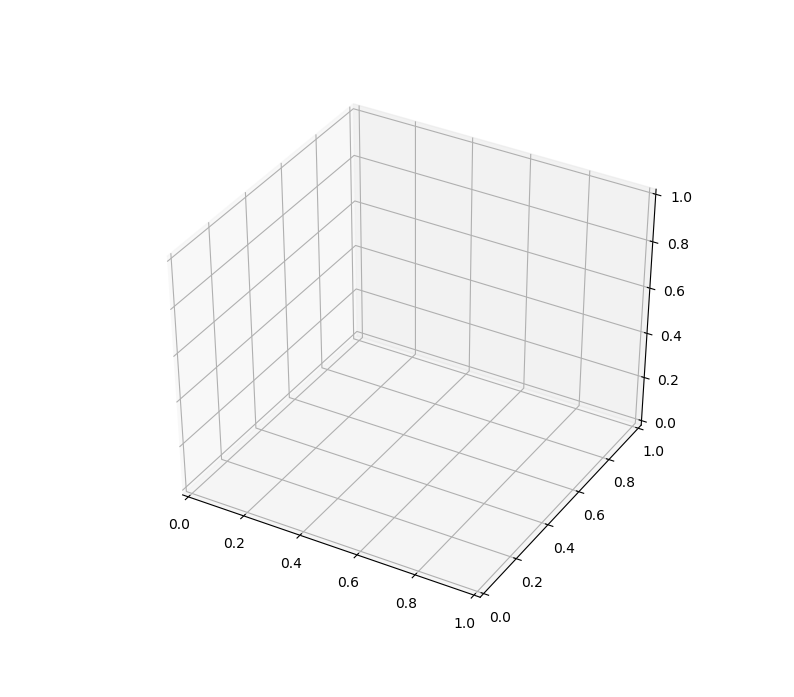

In [10]:
'''
    Plot
'''

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel('x (pop size)')
ax.set_ylabel('y (rel. sample size)')
ax.set_zlabel('z')

plt.show()